# Übung 2 - Aufgabe 5

Realisieren Sie einen Algorithmus zur Berechnung von Amplitudengang und Phasengang eines LTI-Systems basierend auf dessen Polen und Nullstellen. Stellen Sie die Pol- und Nullstellen auch in der z-Ebene dar.

# Importing und Plot Config

In [1]:
import numpy as np
from numpy import random

from scipy import signal

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Definiere Übertragungsfunktion

a) Verwenden Sie als Beispiel das System mit den Nullstellen bei $n_1=1/2$, $n_2=2$ bzw. Polstellen bei $p_{1,2}=\pm 0.9\mathrm{j}$.

b) Erstellen Sie eine Funktion, die eine Übertragungsfunktion mit zufälliger Anzahl und zufälligen Werten der Pol- und Nullstellen. Die Verteilung der Anzahl sei jeweils gleichverteilt zwischen 1 und 6. Die Verteilung des Real- bzw. Imaginärteils jeweils $\sim\mathcal{N}(0,1)$.

## Setze Pol- und Nulstellen

In [3]:
# switch for choosing different pol-zero constellations
switch = 1

if switch == 1:
    # constant pre-factor of transfer function
    const = 1  
    
    zeros = np.array( [ 1/2, 2] )
    poles = np.array( [ .9j, -.9j ] )

elif switch == 2:
    # constant pre-factor of transfer function
    const = 10.0 * np.random.rand()
    
    p = random.randint(1,6)
    zeros = np.random.randn(p) + 1j * np.random.randn(p)
    
    q = random.randint(1,6)
    poles = np.random.randn(q) + 1j * random.randn(q)
    
else:
    # constant pre-factor of transfer function    
    const = 0.5
    
    zeros = np.array( [ 0,0,0] ) 
    poles = np.array( [ .5, .25 + 1j * .8, .25 - 1j * .8] )

# Plot in z-Ebene

Text(0.5, 0, 'imag')

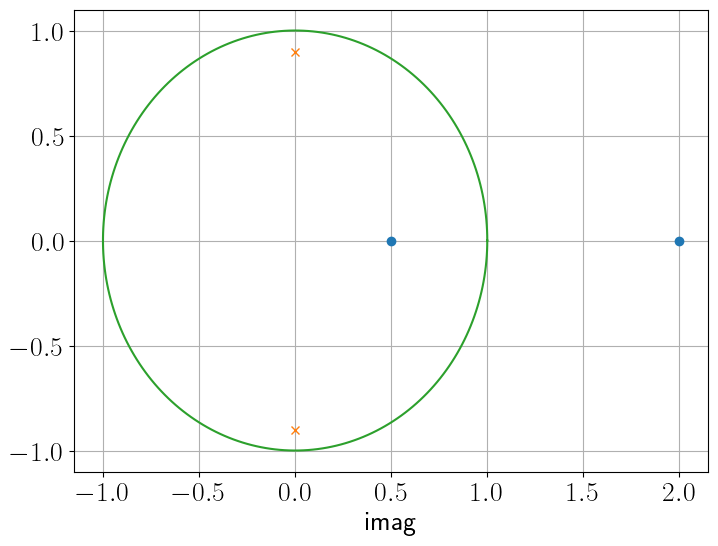

In [4]:
plt.subplot(121)

plt.plot( np.real( zeros ), np.imag( zeros ) , 'o')
plt.plot( np.real( poles ), np.imag( poles ) , 'x')

phi = np.linspace(0, 2*np.pi, 256)
unit_circle = np.exp( 1j * phi )

plt.plot( np.real( unit_circle ) , np.imag( unit_circle ) )

plt.grid( True )
plt.xlabel( 'real' )
plt.xlabel( 'imag' )

# Berechne Übertragungsfunktion

In [5]:
delta_Omega = .01
Omega = np.arange( 0, 2 * np.pi, delta_Omega )

# construct numerator and denominator by multiplying according distances
numerator = np.prod( [ ( np.exp( 1j * Omega ) - z ) for z in zeros ], axis=0 )
denominator = np.prod( [ ( np.exp( 1j * Omega ) - p ) for p in poles ], axis=0 )

# get frequency response
H = const * numerator / denominator

## Plot Amplituden- und Phasengang

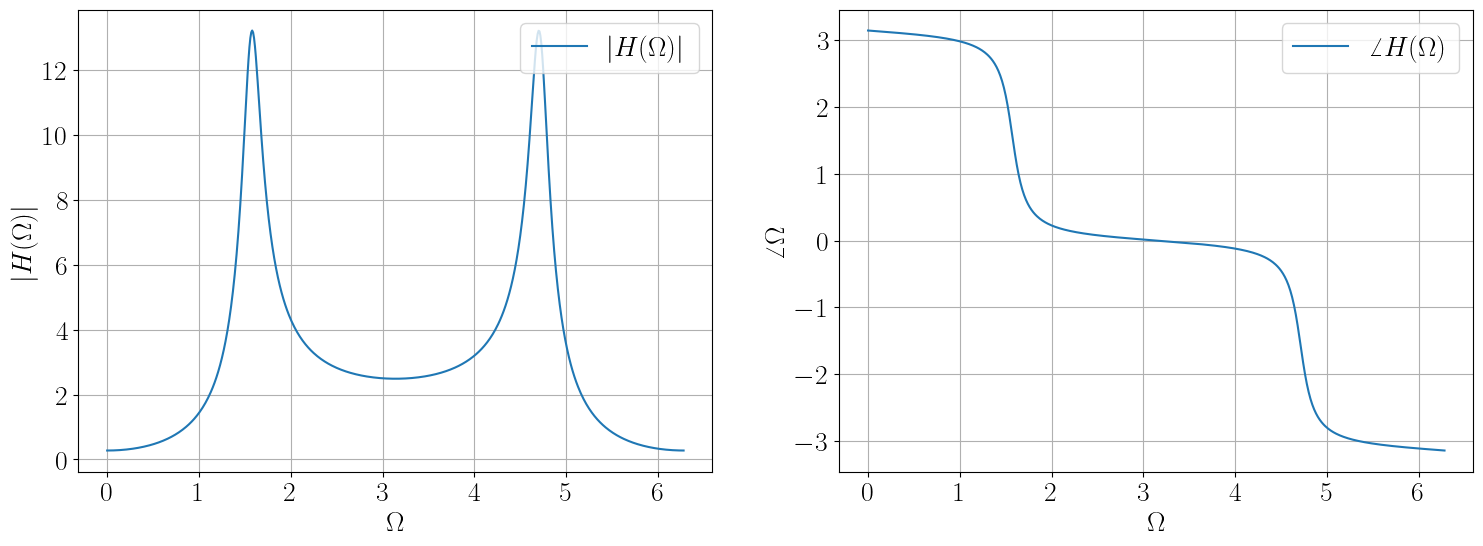

In [6]:
plt.subplot(121)
plt.plot( Omega, np.abs( H ), label='$|H(\\Omega)|$' )

plt.grid( True )
plt.xlabel('$\\Omega$')
plt.ylabel('$|H(\\Omega)|$')
plt.legend(loc='upper right')

plt.subplot(122)
plt.plot( Omega, np.angle( H ), label='$\\angle H(\\Omega)$' )

plt.grid( True )
plt.xlabel('$\\Omega$')
plt.ylabel('$\\angle \\Omega$')
plt.legend(loc='upper right')